In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
learning_rate = 0.001	
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



2024-12-25 14:33:28,353 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'baseline'.
2024-12-25 14:33:28,353 - INFO - Applying baseline augmentations: Resize and Normalize.
2024-12-25 14:33:28,360 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-25 14:33:28,362 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-25 14:33:28,364 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-25 14:33:28,364 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-25 14:33:28,365 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-25 14:33:28,365 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-25 14:33:28,366 - INFO - Class 'fire' has 730 samples.
2024-12-25 14:33:28,368 - INFO - Class 'nofire' has 1157 samples.
2024-12-25 14:33:28,368 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 0.

[INFO] Loading datasets...


2024-12-25 14:33:29,537 - INFO - DataLoaders created successfully.


[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: ConvnextTiny\n")
print("[INFO] Initializing ConvnextTiny model...")
model = initialize_model(
    model_name="convnext_tiny",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True ,
    dropout_prob=0.0
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: ConvnextTiny

[INFO] Initializing ConvnextTiny model...
[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
import time

# Start the timer
start_time = time.time()
print("Training started...")

print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    device=device,
    save_path=f"outputs/models/baseline/convnext_tiny.pt",
    early_stop_patience=12,
    monitor_metric="val_f1",
)
print("[INFO] Training completed successfully!")

end_time = time.time()
elapsed_time = end_time - start_time

hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)

print(f"Training completed in {hours} hours, {minutes} minutes, and {seconds} seconds.")

Training started...
[INFO] Starting model training...

Starting training...



[INFO] Best model saved with val_f1: 0.8791
Epoch [1]: Train Loss: 0.5377, Train Acc: 0.7833 | Val Loss: 0.4341, Val Acc: 0.8433, Val Recall: 0.9309, Val F1: 0.8791


[INFO] Best model saved with val_f1: 0.8863
Epoch [2]: Train Loss: 0.4095, Train Acc: 0.8474 | Val Loss: 0.3735, Val Acc: 0.8532, Val Recall: 0.9350, Val F1: 0.8863


[INFO] Best model saved with val_f1: 0.9014
Epoch [3]: Train Loss: 0.3692, Train Acc: 0.8500 | Val Loss: 0.3427, Val Acc: 0.8731, Val Recall: 0.9472, Val F1: 0.9014


[INFO] Best model saved with val_f1: 0.9055
Epoch [4]: Train Loss: 0.3526, Train Acc: 0.8437 | Val Loss: 0.3282, Val Acc: 0.8806, Val Recall: 0.9350, Val F1: 0.9055


[INFO] Best model saved with val_f1: 0.9080
Epoch [5]: Train Loss: 0.3347, Train Acc: 0.8532 | Val Loss: 0.3126, Val Acc: 0.8856, Val Recall: 0.9228, Val F1: 0.9080


[INFO] Best model saved with val_f1: 0.9124
Epoch [6]: Train Loss: 0.2996, Train Acc: 0.8776 | Val Loss: 0.3003, Val Acc: 0.8905, Val Recall: 0.9309, Val F1: 0.9124


[INFO] Best model saved with val_f1: 0.9157
Epoch [7]: Train Loss: 0.2871, Train Acc: 0.8898 | Val Loss: 0.2922, Val Acc: 0.8955, Val Recall: 0.9268, Val F1: 0.9157


[INFO] Best model saved with val_f1: 0.9203
Epoch [8]: Train Loss: 0.2879, Train Acc: 0.8839 | Val Loss: 0.2806, Val Acc: 0.9005, Val Recall: 0.9390, Val F1: 0.9203


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [9]: Train Loss: 0.2662, Train Acc: 0.8972 | Val Loss: 0.2742, Val Acc: 0.8955, Val Recall: 0.9472, Val F1: 0.9173


[INFO] Best model saved with val_f1: 0.9249
Epoch [10]: Train Loss: 0.2595, Train Acc: 0.9020 | Val Loss: 0.2698, Val Acc: 0.9055, Val Recall: 0.9512, Val F1: 0.9249


[INFO] Best model saved with val_f1: 0.9270
Epoch [11]: Train Loss: 0.2504, Train Acc: 0.9041 | Val Loss: 0.2642, Val Acc: 0.9080, Val Recall: 0.9553, Val F1: 0.9270


[INFO] Best model saved with val_f1: 0.9280
Epoch [12]: Train Loss: 0.2295, Train Acc: 0.9099 | Val Loss: 0.2600, Val Acc: 0.9104, Val Recall: 0.9431, Val F1: 0.9280


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [13]: Train Loss: 0.2470, Train Acc: 0.9099 | Val Loss: 0.2614, Val Acc: 0.9104, Val Recall: 0.9268, Val F1: 0.9268


[INFO] Best model saved with val_f1: 0.9312
Epoch [14]: Train Loss: 0.2459, Train Acc: 0.8998 | Val Loss: 0.2564, Val Acc: 0.9154, Val Recall: 0.9350, Val F1: 0.9312


[INFO] Best model saved with val_f1: 0.9344
Epoch [15]: Train Loss: 0.2473, Train Acc: 0.9025 | Val Loss: 0.2511, Val Acc: 0.9179, Val Recall: 0.9553, Val F1: 0.9344


[INFO] Best model saved with val_f1: 0.9360
Epoch [16]: Train Loss: 0.2345, Train Acc: 0.9099 | Val Loss: 0.2479, Val Acc: 0.9204, Val Recall: 0.9512, Val F1: 0.9360


[INFO] Best model saved with val_f1: 0.9402
Epoch [17]: Train Loss: 0.2067, Train Acc: 0.9205 | Val Loss: 0.2460, Val Acc: 0.9254, Val Recall: 0.9593, Val F1: 0.9402


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [18]: Train Loss: 0.2070, Train Acc: 0.9237 | Val Loss: 0.2436, Val Acc: 0.9179, Val Recall: 0.9472, Val F1: 0.9339


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [19]: Train Loss: 0.2115, Train Acc: 0.9168 | Val Loss: 0.2429, Val Acc: 0.9129, Val Recall: 0.9431, Val F1: 0.9299


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [20]: Train Loss: 0.2202, Train Acc: 0.9163 | Val Loss: 0.2406, Val Acc: 0.9129, Val Recall: 0.9593, Val F1: 0.9310


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [21]: Train Loss: 0.2155, Train Acc: 0.9184 | Val Loss: 0.2414, Val Acc: 0.9154, Val Recall: 0.9309, Val F1: 0.9309


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [22]: Train Loss: 0.2053, Train Acc: 0.9189 | Val Loss: 0.2372, Val Acc: 0.9179, Val Recall: 0.9553, Val F1: 0.9344


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [23]: Train Loss: 0.2053, Train Acc: 0.9131 | Val Loss: 0.2360, Val Acc: 0.9154, Val Recall: 0.9512, Val F1: 0.9323


[INFO] No improvement in val_f1. Patience: 7/12
Epoch [24]: Train Loss: 0.2093, Train Acc: 0.9141 | Val Loss: 0.2361, Val Acc: 0.9204, Val Recall: 0.9512, Val F1: 0.9360


[INFO] No improvement in val_f1. Patience: 8/12
Epoch [25]: Train Loss: 0.2026, Train Acc: 0.9226 | Val Loss: 0.2339, Val Acc: 0.9154, Val Recall: 0.9472, Val F1: 0.9320


[INFO] No improvement in val_f1. Patience: 9/12
Epoch [26]: Train Loss: 0.1907, Train Acc: 0.9285 | Val Loss: 0.2322, Val Acc: 0.9154, Val Recall: 0.9472, Val F1: 0.9320


[INFO] No improvement in val_f1. Patience: 10/12
Epoch [27]: Train Loss: 0.2116, Train Acc: 0.9089 | Val Loss: 0.2322, Val Acc: 0.9179, Val Recall: 0.9390, Val F1: 0.9333


[INFO] No improvement in val_f1. Patience: 11/12
Epoch [28]: Train Loss: 0.1836, Train Acc: 0.9322 | Val Loss: 0.2345, Val Acc: 0.9104, Val Recall: 0.9268, Val F1: 0.9268


[INFO] No improvement in val_f1. Patience: 12/12
Epoch [29]: Train Loss: 0.1976, Train Acc: 0.9184 | Val Loss: 0.2309, Val Acc: 0.9154, Val Recall: 0.9512, Val F1: 0.9323
[INFO] Final metrics saved to outputs/models/baseline\final_metrics.json
[INFO] Training stopped after 29 epochs. Best val_f1: 0.9402

[INFO] Training completed successfully!
Training completed in 0 hours, 3 minutes, and 37 seconds.


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name="convnext_tiny",
    save_base_path="outputs/plots/baseline",
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/baseline\convnext_tiny\convnext_tiny_evaluation.json

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.9032258064516129, 'recall': 0.8805031446540881, 'f1-score': 0.89171974522293, 'support': 159.0}, 'Fire': {'precision': 0.9254901960784314, 'recall': 0.9402390438247012, 'f1-score': 0.932806324110672, 'support': 251.0}, 'accuracy': 0.9170731707317074, 'macro avg': {'precision': 0.9143580012650221, 'recall': 0.9103710942393947, 'f1-score': 0.912263034666801, 'support': 410.0}, 'weighted avg': {'precision': 0.9168559571743724, 'recall': 0.9170731707317074, 'f1-score': 0.9168727483956695, 'support': 410.0}}, 'confusion_matrix': [[140, 19], [15, 236]], 'roc_auc': 0.9772732967501065, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[INFO] Training plot saved to outputs/plots/baseline/convnext_baseline_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/baseline/convnext_baseline_confusion_matrix.png
[INFO] All results saved successfully!


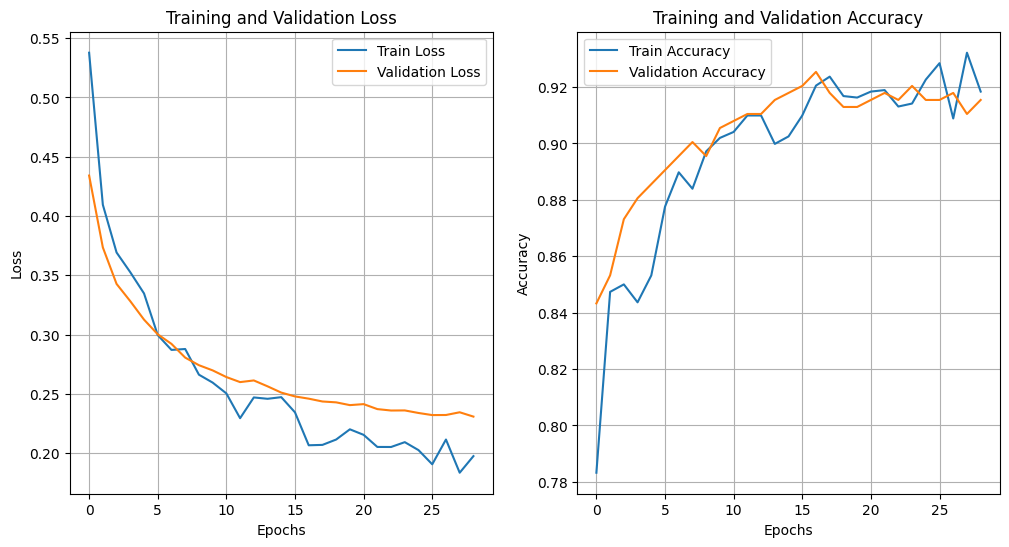

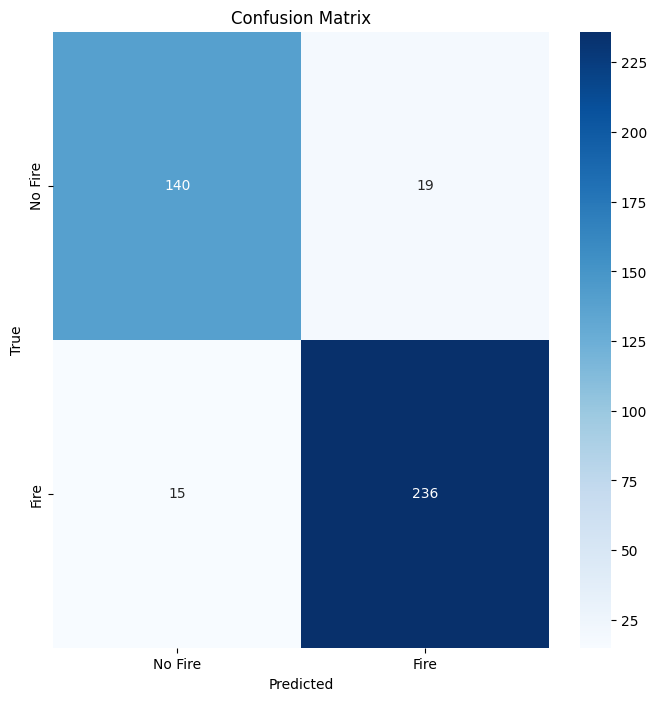

: 

In [10]:
plot_training(history, f"outputs/plots/baseline/convnext_baseline_training_curve.png")

plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=f"outputs/plots/baseline/convnext_baseline_confusion_matrix.png"
)

# Precision-Recall Curve
if "y_probs" in metrics:
    y_true = metrics["y_true"]
    y_probs = [prob[1] for prob in metrics["y_probs"]]
    plot_precision_recall(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/convnext_baseline_precision_recall_curve.png"
    )

    # ROC Curve
    plot_roc_curve(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/convnext_baseline_roc_curve.png"
    )

print("[INFO] All results saved successfully!")